# Text mining in Python (Complete guide for 2024) - H1

- Intro - short and concise, it needs to make the readers want to read more.
- Ensure the reader that they will learn how to do text mining in Python from scratch and that everything will be easy to learn, step-by-step.

## What is text mining?

Text mining is the process of extracting useful information from the unstructured text data, using NLP and AI techniques. With the public availability of a huge amount of unstructured text data, text mining finds its applications in various fields from business intelligence (like chat bots) to academic research.

## Prerequisites for text mining in Python

For this guide, we don’t expect much from the user. Some basic familarity with Python and having a computer installed with Python (3.8+) is sufficient. 

### Setting up the environment

One of the coolest features of Python is environment. Environments ensure that we have separate libraries installations for separate projects and as a result, they avoid us the trouble of the conflicting versions required for different project. There are two ways of setting up an environment in Python.

**Conda**

If you have Anaconda installed, you can either set up the environment using the Anaconda Navigator’s GUI or from the command line as:

```bash
conda create --name NLP
```

If you want to specify the Python version explicitly, please append it in the command.

```bash
conda create --name NLP python=3.12
```

Once created, we can activate it and then install the respective libraries.

```bash
conda activate NLP
conda install nltk pandas matplotlib re spacy vader wordcloud
```

**Default Python**

If you don’t want to use Conda, we can use normal Python for environment setup as well. The same steps would be replicated as:

```bash
python -m venv NLP_Default
source NLP_Default/bin/activate
pip install nltk pandas matplotlib re spacy vader wordcloud
```

Now our environment is setup, we are ready to begin text mining.

## 2. Text preprocessing

Similar to any other data, text also requires preprocessing. Text is usually found in a pretty raw form and requires some preprocessing steps.

### **Cleaning text data - H3**

Consider a crawled tweet: 

> BREAKING: #LIGO confirms #gravitationalwaves detected for 1st time. \n  https://t.co/2lMvheiDcW https://t.co/Njoa0Y8mBe

Now, its obvious that these hashtags, in fact any punctuation mark is unnecessary. Similarly, special characters and links have no link to the subject either. So, we should remove them.



Explain what it means to clean the text data and why it’s important.
- Removing punctuation, numbers, special characters, HTML tags and special characters, and lowercase text.
- Example code snippet.



In [1]:
import re
text = "BREAKING: #LIGO confirms #gravitationalwaves detected for 1st time. \n  https://t.co/2lMvheiDcW https://t.co/Njoa0Y8mBe"

punctuation_free_text = re.sub(r'(https://t.co/)+[0-9a-zA-Z]{10}', '', text)
punctuation_free_text

'BREAKING: #LIGO confirms #gravitationalwaves detected for 1st time. \n   '

In [2]:
punctuation_free_text = re.sub(r'[\n]+', '', punctuation_free_text)
punctuation_free_text.strip()

'BREAKING: #LIGO confirms #gravitationalwaves detected for 1st time.'

### **Tokenization**

Before processing the text, it needs to be converted into smaller units. This conversion is known as tokenization. While tokenization can refer to sentence, word or character tokenization, it usually refers to word tokenization. In word tokenization, we take a text and it splits it into _words_. NLTK has a built-in function, `word_tokenize()` for this purpose.



In [3]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize, LancasterStemmer

tokens = word_tokenize("The quick brown fox jumps over the lazy dog.")

tokens

[nltk_data] Downloading package punkt_tab to /Users/talha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']

As you can see that punctuation marks (period in this case) are also part of the tokens. Whether you want to keep the punctuation marks or not is your personal call. In some cases punctuation marks are just trivial, but in other cases, they may contain quite helpful contextual information (like commas, colons, etc.) If you want to remove them, you can use the `string.punctuation` list to filter out.

In [4]:
import string
tokens_without_punctuation = [word for word in tokens if word not in string.punctuation]

tokens_without_punctuation


['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### **Removing stop words**

Stop words refer to the redundant words carrying lesser contextual information. They include articles, prepositions, etc. To remove the stop words (or use them for any purpose), we download them from NLTK and set them to English stop words.



In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/talha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
tokens_without_stopwords = [word for word in tokens if word not in stop_words]

tokens_without_stopwords

['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']

It's an open debate whether these stopwords are necessary for the contextual information. So its upto the user again whether to use them or not. Why I am personally so cautious about removing the stop words is based on the fact that stop words contain valuable contextual information. This example will further explain it.

In [7]:
tokens = word_tokenize("To be or not to be")
tokens_without_stopwords = [word for word in tokens if word not in stop_words]

tokens_without_stopwords

['To']

I am unsure what will be Shakespeare's sentiments on this treatment. As we can see, stop words may have trivial information, but they are useful and their advantages outweigh the disadvantages.

### **Stemming and lemmatization**

Stemming is a linguistics technique, which refers to going down the stem/root of a word. In stemming, we use simple (heuristic) rules to cut a word to its origin. Playing is a verb, so just drop its “ing” and we will get “play.” 

We will use `PorterStemmer` here. Named after [its author](https://tartarus.org/martin/PorterStemmer/def.txt), it is one of the earliest stemming algorithms. 

In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem = stemmer.stem("playing")  

stem #play

'play'

But it comes with its limitations. For example, trying “happiness” will result into “happi” which is not a valid word. 

In [9]:
stem = stemmer.stem("happiness") 
stem

'happi'

NLTK features some other stemmers too, so lets try an alternative one. 

In [10]:
from nltk.stem import LancasterStemmer

stem = LancasterStemmer().stem("happiness") #happi
stem

'happy'

**Lemmatization**

Lemma also means the root/basic form of a word, though it should be part of a dictionary too (i.e. realized as a standalone word). Here’s how [Cambridge English Dictionary](https://dictionary.cambridge.org/dictionary/english/lemma) defines a *lemma*:

> Lemma is a [form](https://dictionary.cambridge.org/dictionary/english/form) of a word that appears as an entry in a dictionary and is used to represent all the other possible forms. For example, the lemma "build" represents "builds", "building", "built", etc. - Cambridge English Dictionary
> 

For lemmatization, we lookup the word in the dictionaries. Every NLP library, including NLTK include some dictionaries which are used for lemmatization. Lemmatization, as a result, is more accurate and as we can see that in the *happiness* example.

For lemmatization, we require the `wordnet` package and respective lemmatizer.

In [11]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

lemma = lemmatizer.lemmatize("happiness", pos=wordnet.NOUN)

lemma #happiness

[nltk_data] Downloading package wordnet to /Users/talha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'happiness'

**Difference**

Some people may find it a bit confusing to differentiate between [the two terms](https://blog.apify.com/nlp-techniques/#stemming-and-lemmatization). But they aren’t. Both serve the same purpose: stemming uses fixed heuristic rules and hence is faster, while lemmatization does a dictionary lookup, consequently is slower but more accurate.

## 3. Text representation

Text features can be represented in a number of ways. We will quickly review some of the common text representation models.

### **Bag of words model**

The Bag of Words (BoW) model treats text as a collection of words and creates representations of each word proportional to its frequency. To use BoW features, we can use **`CountVectorizer`** from Scikit-learn.



In [12]:
!pip install scikit-learn

from sklearn.feature_extraction.text import CountVectorizer

After instantiating the `CountVectorizer`, we can use the `fit_transform()` method. This method takes the vocabulary of the given text samples and converts their respective frequency into the respective (BoW) features.

In [13]:
import pandas as pd

text_samples = [
    "Manila is the capital of Phillipines.",
    "Capital investment model, despite its flaws, is highly successful.",
    "23 September is equinox."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_samples)

X = X.toarray()
df= pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

df

,23,capital,despite,equinox,flaws,highly,investment,is,its,manila,model,of,phillipines,september,successful,the
0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1
1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


### **TF-IDF model**

BoW approach has a serious limitation as it doesn't take into account the contextual information or grammar.  A better approach, Term Frequency-Inverse Document Frequency (TF-IDF) takes into account the relative frequency of a term (with respect to overall frequency across all the samples/documents).

Scikit-learn provides a vectorizer for TF-IDF too.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_samples)

X = X.toarray()
df= pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

df

,23,capital,despite,equinox,flaws,highly,investment,is,its,manila,model,of,phillipines,september,successful,the
0,0.000000,0.342620,0.000000,0.000000,0.000000,0.000000,0.000000,0.266075,0.000000,0.450504,0.000000,0.450504,0.450504,0.000000,0.000000,0.450504
1,0.000000,0.270118,0.355173,0.000000,0.355173,0.355173,0.355173,0.209771,0.355173,0.000000,0.355173,0.000000,0.000000,0.000000,0.355173,0.000000
2,0.546454,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000,0.322745,0.000000,0.000000,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000


Lets look into these calculations in a bit more detail. 

In [15]:
vectorizer.get_feature_names_out()

array(['23', 'capital', 'despite', 'equinox', 'flaws', 'highly',
       'investment', 'is', 'its', 'manila', 'model', 'of', 'phillipines',
       'september', 'successful', 'the'], dtype=object)

### **Word embeddings**

TF-IDF is a bit better than BoWs in giving relative weights to words, but it also lacks the information about how similar or dissimilar two words are. Word embedding models project words into the (continuous) vector space. As a result, semantically similar words have closer embeddings too.

While BoW or TF-IDF representations work well only on the smaller data, word embeddings are scalable to very big datasets. Models like GPT family or BERT (or any transformer models) are trained using these embeddings (we can train smaller RNN-based models too). Mainly, these models differ in the way they calculate these embeddings. 

These embeddings become even more important in the context of ever-growing interest in the vector databases.

In [16]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

tokenized_samples = [word_tokenize(text) for text in text_samples]

model = Word2Vec(sentences=tokenized_samples, vector_size=100, window=5, min_count=1, workers=4)


In [17]:
# Get the vector for a word
vector = model.wv['capital']
print("Vector for 'language':")
print(vector)

# Find similar words
similar_words = model.wv.most_similar('capital', topn=5)
print("\nWords similar to 'language':")
print(similar_words)

Vector for 'language':
[ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977e-03 -8.40115082e-03
 -

## 4. Text mining techniques - H2

- Short intro to the section.

### **Text Classification - H3**

- Explain what it is - building and training a classifier.
- Example code snippet.

### **Text Clustering - H3**

- Explanation of clustering algorithms, what they are, how they work, and why they are important.
- Example code snippet.

### **Topic Modeling - H3**

- Explanation of topic modeling, what it is, how we use it, and why it’s important.
- Example code snippet.

In [18]:
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_samples)

clusters = KMeans(n_clusters=2).fit(X)

for i, text in enumerate(text_samples):
    print(f"Cluster {clusters.labels_[i]}: \t{text}")

Cluster 1: 	Manila is the capital of Phillipines.
Cluster 1: 	Capital investment model, despite its flaws, is highly successful.
Cluster 0: 	23 September is equinox.


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X,[1,0,1])

model.predict(vectorizer.transform(["22 Dec is Winter Solstice."]))

array([1])

In [20]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=2) 
X_lsa = lsa.fit_transform(X)

terms = vectorizer.get_feature_names_out()

# Show components
print("\nComponents (Topics):")
for i, component in enumerate(lsa.components_):
    print(f"Topic {i}:")
    for index in component.argsort()[-3:]:  # Top 3 terms per topic
        print(f"  {terms[index]}")



Components (Topics):
Topic 0:
  the
  capital
  is
Topic 1:
  23
  equinox
  september


## 5. Named entity recognition (NER)

Named Entity Recognition (NER) is an excellent application of text mining. NER allows us to find names of people, places, etc. (i.e. pronouns) and also some specific information in the text. 
For NER, we will use Spacy library (it has better results than NLTK for NER). Before using the English model, its necessary to download it first.
```
python -m spacy download en_core_web_sm
```

In [21]:
import spacy
english_model = spacy.load("en_core_web_sm")

text = "Mrs. Linton saw Isabella tear herself free, and run into the garden; and a minute after, Heathcliff opened the door."
processed_text = english_model(text)

Passing text through the Spacy model processes it to fetch the NEs in the `ents` attribute. We can easily iterate over it to fetch these entities 

In [22]:
for entity in processed_text.ents:
    print(entity.text, entity.label_)

Linton PERSON
Isabella PERSON
a minute TIME
Heathcliff ORG


At first, I thought that maybe its an occasional mistake. But I tried some other examples too and this ORG issue kept recurring. Lets use an advanced transfomer model to see if it fixes this?

In [23]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)
text = "Mrs. Linton saw Isabella tear herself free, and run into the garden; and a minute after, Heathcliff opened the door."

ner_results = ner_pipeline(text)

ner_results

/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'B-PER',
  'score': 0.5869316,
  'index': 3,
  'word': 'Lin',
  'start': 5,
  'end': 8},
 {'entity': 'B-PER',
  'score': 0.99575436,
  'index': 6,
  'word': 'Isabella',
  'start': 16,
  'end': 24},
 {'entity': 'B-PER',
  'score': 0.9910059,
  'index': 22,
  'word': 'Heath',
  'start': 89,
  'end': 94},
 {'entity': 'B-PER',
  'score': 0.5074362,
  'index': 23,
  'word': '##cliff',
  'start': 94,
  'end': 99}]

Now, it fixed the Healthcliff being recognized as an organization issue, but led to another one where it is disregarding Linton as a person's name and recognizing Lin instead. These models have their pros and cons and I admit that these couple of examples are insufficient to judge them.

## 6. Sentiment analysis

Sentiment analysis is another useful application of text processing. Often we are interested in seeing the tone of a message, <add some other examples>.
Usually sentiment classification is based on 3 categories: positive, negative and neutral. With a large amount of (unlabelled) data, **VADER (Valence Aware Dictionary and sEntiment Reasoner)** is an useful tool to label them accordingly. VADER is free and can work in a few lines of code, but it comes with its limitations too as its accuracy is around 80%.

Since we have already covered it in detail [in this blog]((<Sentiment Analysis Blog link>), here I will round this off with just a little example of Hugging Face.

In [24]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", tokenizer=AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")) #Please feel free to use Model of your own choice

df = pd.read_csv("consolidatedTweets.csv")
df['label'] = df['full_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


#df[['full_text', 'label']].to_csv("consolidatedTweets_HFLabels.csv", index=False)

/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## 7. Text visualization - H2

- Explain what a visualization of text mining is, why it’s important, how you can do it, etc.

### Word clouds - H3

- Explain what word clouds are.
- Generate word clouds for data visualization. Include an example code snippet using the wordcloud library.
- Show a screenshot of the final result.

### **Bar plots and histograms - H3**

- Visualizing text data distribution, explain what are bar plots and histograms and why it’s important. Include an example code snippet using (probably using the matplotlib or seaborn library).
- Show a screenshot of the final result.

In [43]:
from datasets import load_dataset
dataset = load_dataset("ag_news")

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [44]:
dataset['train']['text']

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

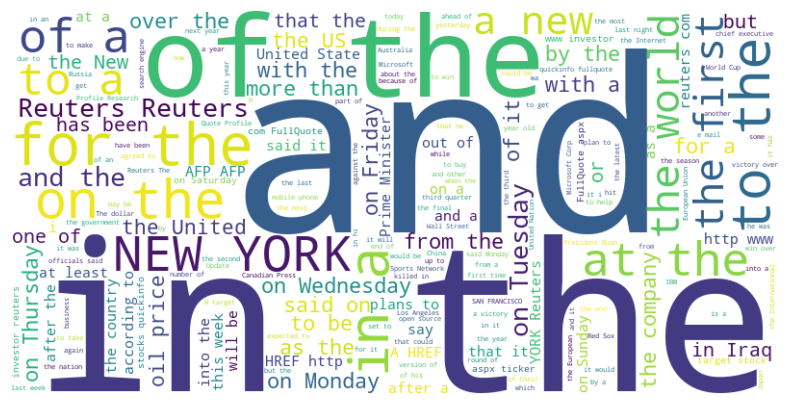

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
dataset_plain_text = " ".join(dataset['train']['text'])
noisy_words = ["AP", "quot", "U", "S", "gt", "lt", "b"]
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=noisy_words).generate(dataset_plain_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
# Ensure stopwords are downloaded
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/talha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
from collections import Counter

words = dataset_plain_text.lower().split()  
words = [word for word in dataset_plain_text.lower().split() if word not in stopwords]
word_counts = Counter(words)

df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(df['Word'],df['Frequency'], color=['green', 'yellow'])
plt.title('Top 20 Words in Dataset')
plt.show()

TypeError: argument of type 'WordListCorpusReader' is not iterable